In [15]:
from data import Datagenerator, TrainingStats
from model import LEO, load_model, save_model
from  torch.nn import MSELoss
from easydict import EasyDict as edict
from utils import load_config, check_experiment
from run import train_model
import torch.optim as optim
import argparse
import torch 
import torch.optim
import gc
from utils import display_data_shape, get_named_dict, one_hot_target,\
    softmax, sparse_crossentropy, calc_iou_per_class, log_data, load_config
import matplotlib.pyplot as plt
import numpy as np

In [2]:
config = load_config()

In [3]:
leo, meta_data, classes = train_model(config)

num tasks: 7
tr_data shape: torch.Size([7, 2, 384, 512, 14]),tr_data_masks shape: torch.Size([7, 2, 384, 512]), val_data shape: torch.Size([7, 5, 384, 512, 14]),val_masks shape: torch.Size([7, 5, 384, 512])


C:\Users\temil\OneDrive\Documents\Study\UHildesheim\Project\Scripts\leo-srp-project\merge_to_dev\leo_segmentation\leo_segmentation\model.py:73: UserWarning: Mixed memory format inputs detected while calling the operator. The operator will output channels_last tensor even if some of the inputs are not in channels_last format. (Triggered internally at  ..\aten\src\ATen\native\TensorIterator.cpp:924.)
  channel_zero = inputs * predicted_weights[:, :14, :, :]


Class: aeroplane, Episode: 1, Val IOU: 0.00011857515455533565
Class: bicycle, Episode: 1, Val IOU: 0.11147527023191886
Class: bird, Episode: 1, Val IOU: 0.006834868617891064
Class: boat, Episode: 1, Val IOU: 0.0054910328531102255
Class: bottle, Episode: 1, Val IOU: 0.001954490580154511
Class: bus, Episode: 1, Val IOU: 0.0464587328476183
Class: car, Episode: 1, Val IOU: 0.005808288237222736

mode:meta_train, episode:001, kl_loss:0.000000, total_val_loss:0.610867
Class: aeroplane, Episode: 2, Val IOU: 0.07310804228552151
Class: bicycle, Episode: 2, Val IOU: 0.0017249309499458305
Class: bird, Episode: 2, Val IOU: 0.04200163246115326
Class: boat, Episode: 2, Val IOU: 0.029020410420715514
Class: bottle, Episode: 2, Val IOU: 0.0028810904830796104
Class: bus, Episode: 2, Val IOU: 0.053097428703764146
Class: car, Episode: 2, Val IOU: 0.000306826070247203

mode:meta_train, episode:002, kl_loss:0.000000, total_val_loss:0.525129
Class: aeroplane, Episode: 3, Val IOU: 0.0025660430368274643
Class: 

In [4]:
leo

LEO(
  (enc1): _EncoderBlock(
    (encode): Sequential(
      (0): Conv2d(14, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
  )
  (enc2): _EncoderBlock(
    (encode): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.5, inplace=False)
    )
  )
  (dec2): _DecoderBlock(
    (decode): Sequential(
      (0): ConvTranspose2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): ReLU()
    )
  )
  (dec1): _DecoderBlock(
    (decode): Sequential(
      (0): ConvTranspose2d(32, 32, kernel_size=(4, 4), stride=(2, 2), paddin

In [5]:
classes

['aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


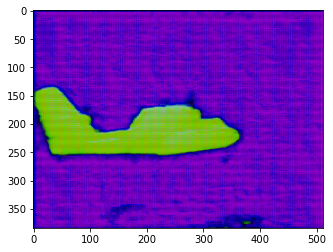

In [57]:
batch_data = get_named_dict(meta_data, 6)
input_data = batch_data.tr_data[0].permute(1, 2, 0)
plt.imshow(input_data.cpu().detach().numpy()[:,:,3:6])

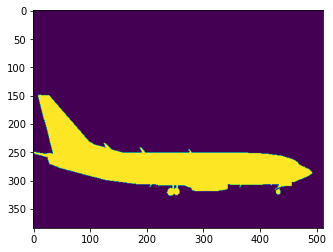

In [58]:
input_mask = batch_data.tr_data_masks[0]
plt.imshow(input_mask.cpu().detach().numpy())

In [59]:
input_data.shape

torch.Size([384, 512, 14])

In [60]:
batch_data.tr_data.shape

torch.Size([2, 14, 384, 512])

In [61]:
latents = leo.forward_encoder(batch_data.tr_data)
_, _, predictions = leo.forward_decoder(batch_data.tr_data, latents, batch_data.tr_data_masks)

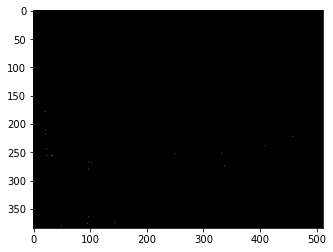

In [66]:
plt.imshow(np.argmax(predictions.cpu().detach().numpy()[1], 0), cmap="gray")

In [40]:
predictions.shape

torch.Size([2, 2, 384, 512])